# Numpy

In [10]:
import numpy as np

### 1. Linear equation 
Find x for Ax = b

In [ ]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)
b = np.array([-5, 0, 10, -17])

In [ ]:
np.set_printoptions(precision=2)
x = np.linalg.inv(A).dot(b)
x


array([ 5.00e+00, -1.00e+00,  2.22e-16, -2.00e+00])

**Tip:** have a look to np.set_printoptions

### 2. Cliping
Set all negatives values of array to zero

In [ ]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)

In [ ]:

# A[A<0]=0
# OR
A.clip(min=0)
A



array([[1, 2, 3, 4],
       [3, 0, 8, 9],
       [5, 1, 0, 7],
       [0, 5, 0, 1]])

### 3. Normalization
Normalize vector x (rescale values between 0, 1)

In [ ]:
x = np.array([-4, 2, -1, 5, -10])

In [ ]:
b = (x - np.min(x))/np.ptp(x)
b

array([0.4, 0.8, 0.6, 1. , 0. ])

### 4. Standardize
Standardize image with shape (height, width, channels). \
Each channel should have zero mean and unit variance.

In [ ]:
img = np.array([
     [[105, 121,  90], [109, 125,  94], [107, 125,  89], [106, 124, 86]],
     [[106, 123,  90], [107, 124,  91], [106, 125,  87], [108, 123, 81]],
     [[106, 123,  90], [107, 124,  91], [107, 126,  88], [107, 123, 85]],
     [[107, 125,  90], [106, 122,  89], [108, 126,  89], [103, 121, 83]]
])

In [ ]:
mean = np.mean(img)
std = np.std(img)
img = (img - mean) / std
img

array([[[-0.08,  1.01, -1.11],
        [ 0.19,  1.28, -0.83],
        [ 0.05,  1.28, -1.18],
        [-0.01,  1.22, -1.38]],

       [[-0.01,  1.15, -1.11],
        [ 0.05,  1.22, -1.04],
        [-0.01,  1.28, -1.31],
        [ 0.12,  1.15, -1.72]],

       [[-0.01,  1.15, -1.11],
        [ 0.05,  1.22, -1.04],
        [ 0.05,  1.35, -1.24],
        [ 0.05,  1.15, -1.45]],

       [[ 0.05,  1.28, -1.11],
        [-0.01,  1.08, -1.18],
        [ 0.12,  1.35, -1.18],
        [-0.22,  1.01, -1.59]]])

### 5. Euclidian distance
Calculate distance matrix between two sets of pooints 

In [13]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[9, 8], [7, 6], [5, 4], [3, 2]])

In [23]:
# from sklearn.metrics.pairwise import euclidean_distances
# euclidean_distances(a, b)
np.linalg.norm(a[:, None, :] - b[None, :, :], axis=2)

array([[10.        ,  7.21110255,  4.47213595,  2.        ],
       [ 7.21110255,  4.47213595,  2.        ,  2.        ],
       [ 4.47213595,  2.        ,  2.        ,  4.47213595]])

# Pandas

In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
df = pd.read_csv(url)
%matplotlib inline

### Task 1
Find the name, age and sex of oldest passenger on Titanic

In [ ]:
not_survived_mean = df[df["Survived"] == 0]["Age"].mean()
survived_mean = df[df["Survived"] == 1]["Age"].mean()
df.loc[(df["Survived"] == 0) & (df["Age"].isnull()), "Age"] = not_survived_mean
df.loc[(df["Survived"] == 1) & (df["Age"].isnull()), "Age"] = survived_mean
df[["Name", "Age", "Sex"]].sort_values("Age").tail(1)

,Name,Age,Sex
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,male


### Task 2
Show rows with passengers with age greater than 5 percantile and less than 95 percantile

In [ ]:
df[df.Age < df["Age"].quantile(.95)][df.Age > df["Age"].quantile(.05)]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.626179,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### Task 3

Show correlation between features

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035652,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.085364,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.327130,0.083081,0.018443,-0.549500
Age,0.035652,-0.085364,-0.327130,1.000000,-0.230465,-0.179217,0.089267
SibSp,-0.057527,-0.035322,0.083081,-0.230465,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179217,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089267,0.159651,0.216225,1.000000


### Task 4
Find average fare for survived and not survived passengers 

In [ ]:
not_survived_mean = df[df["Survived"] == 0]["Fare"].mean()
survived_mean = df[df["Survived"] == 1]["Fare"].mean()
print(not_survived_mean, survived_mean)

22.117886885245877 48.39540760233917


### Task 5
Vizualize boxplot to compare distributions of survived and not survived passengers.

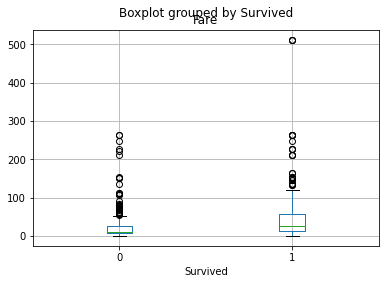

In [ ]:
df.boxplot(["Fare"], "Survived")